<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Cleaning</a></span><ul class="toc-item"><li><span><a href="#Splitting-Gender-and-Filtering-Age" data-toc-modified-id="Splitting-Gender-and-Filtering-Age-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Splitting Gender and Filtering Age</a></span></li><li><span><a href="#Creating-Categorical-Shirt-Sizes" data-toc-modified-id="Creating-Categorical-Shirt-Sizes-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Creating Categorical Shirt Sizes</a></span></li><li><span><a href="#Rebuilding-the-Data-Frame" data-toc-modified-id="Rebuilding-the-Data-Frame-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Rebuilding the Data Frame</a></span></li></ul></li><li><span><a href="#EDA" data-toc-modified-id="EDA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#PCA" data-toc-modified-id="PCA-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>PCA</a></span></li><li><span><a href="#TSNE" data-toc-modified-id="TSNE-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>TSNE</a></span></li></ul></li><li><span><a href="#Model-Selection" data-toc-modified-id="Model-Selection-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model Selection</a></span><ul class="toc-item"><li><span><a href="#Linear-Regression-on-PCA" data-toc-modified-id="Linear-Regression-on-PCA-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Linear Regression on PCA</a></span></li><li><span><a href="#sklearn-Feature-Selection-vs-PCA" data-toc-modified-id="sklearn-Feature-Selection-vs-PCA-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>sklearn Feature Selection vs PCA</a></span></li><li><span><a href="#OLS-Regression-with-Variance-Threshold" data-toc-modified-id="OLS-Regression-with-Variance-Threshold-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>OLS Regression with Variance Threshold</a></span></li><li><span><a href="#OLS-VS-Ridge-and-Lasso." data-toc-modified-id="OLS-VS-Ridge-and-Lasso.-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>OLS VS Ridge and Lasso.</a></span></li><li><span><a href="#Lasso-regression-trained-on-training-data" data-toc-modified-id="Lasso-regression-trained-on-training-data-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Lasso regression trained on training data</a></span></li><li><span><a href="#Lasso-Regression-With-Tuned-Lambda-Trained-on-All-Data" data-toc-modified-id="Lasso-Regression-With-Tuned-Lambda-Trained-on-All-Data-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Lasso Regression With Tuned Lambda Trained on All Data</a></span></li><li><span><a href="#Ridge-Regression" data-toc-modified-id="Ridge-Regression-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Ridge Regression</a></span></li><li><span><a href="#Ridge-Regression-with-Tuned-Alpha" data-toc-modified-id="Ridge-Regression-with-Tuned-Alpha-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Ridge Regression with Tuned Alpha</a></span></li><li><span><a href="#Random-Forest-Regression" data-toc-modified-id="Random-Forest-Regression-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>Random Forest Regression</a></span></li><li><span><a href="#Random-Forest-Regression-With-Tuned-Hyperparameters" data-toc-modified-id="Random-Forest-Regression-With-Tuned-Hyperparameters-3.10"><span class="toc-item-num">3.10&nbsp;&nbsp;</span>Random Forest Regression With Tuned Hyperparameters</a></span></li><li><span><a href="#Tuned-Random-Forest-with-Reduced-Features" data-toc-modified-id="Tuned-Random-Forest-with-Reduced-Features-3.11"><span class="toc-item-num">3.11&nbsp;&nbsp;</span>Tuned Random Forest with Reduced Features</a></span></li></ul></li></ul></div>

In [1]:
import warnings
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")

warnings.filterwarnings("ignore")

%matplotlib inline

# Data Cleaning

In [2]:
# Cleaning the features
df = pd.read_csv(
    'https://raw.githubusercontent.com/Padam-0/cluster_t-shirt_sizing/master/data.csv')

remove_cols = []

# I want to get rid of the columns with more than 2000 Nulls,
# because incomplete data won't be useful.
for i in df.columns:
    if 3900 - df.loc[:, i].astype(bool).sum() > 2000:
        remove_cols.append(i)

df2 = df.drop(remove_cols, axis='columns')

# I don't need these categorical variables
demographic_attributes = ['AGE IN YEARS', 'LOCATION',
                          'BIRTH DATE', 'MEASUREMENT DATE',
                          'MEASUREMENT SET TP',
                          'MEASURER NUMBER', 'COMPUTER NUMBER', 'RACE',
                          'GRADE LEVEL', 'HANDEDNESS', 'NUMBER OF BROTHERS',
                          'NUMBER OF SISTERS', 'TWIN', 'BIRTH ORDER',
                          'MOTHERS OCCUPATION', 'FATHERS OCCUPATION',
                          'MOTHERS EDUCATION', 'FATHERS EDUCATION',
                          'YEARS IN COMMUNITY', 'ANTHROPOMETER NO',
                          'CALIPER NO', 'GIRTH NO', 'PERSON #']

df2 = df2.drop(demographic_attributes, axis='columns')

# Recode Gender Variable


def binary_gender(gender):
    if gender == 1:
        return 0
    else:
        return 1


df2 = df2.replace(0, np.nan)
df2 = df2.dropna()

df2['gender_recode'] = df2['SEX'].apply(binary_gender)

df2 = df2.drop(['SEX'], axis='columns')

df2.head()
# Weight is in hectograms, everything else is millimeter.

,WEIGHT,STATURE,ERECT SITTING HEIGHT,MAXIMUM HIP BREADTH (SEATED),BUTTOCK-KNEE LENGTH,KNEE HEIGHT,HEAD CIRCUMFERENCE,HEAD BREADTH,SHOULDER BREADTH,SHOULDER-ELBOW LENGTH,...,HAND BREADTH,CHEST CIRCUMFERENCE,WAIST CIRCUMFERENCE,HIP CIRCUMFERENCE,UPPER THIGH CIRCUMFERENCE,CALF CIRCUMFERENCE,FOOT LENGTH,FOOT BREADTH,AGE IN MONTHS,gender_recode
12,499.0,1578.0,838.0,330.0,518.0,488.0,532.0,154.0,396.0,338.0,...,78.0,775.0,664.0,858.0,496.0,341.0,250.0,102.0,164.0,1
13,558.0,1618.0,826.0,325.0,568.0,511.0,549.0,152.0,402.0,359.0,...,80.0,859.0,723.0,856.0,526.0,331.0,243.0,98.0,167.0,1
15,400.0,1468.0,766.0,297.0,509.0,452.0,512.0,145.0,353.0,311.0,...,75.0,711.0,652.0,788.0,453.0,303.0,232.0,96.0,160.0,1
18,359.0,1528.0,778.0,279.0,518.0,503.0,547.0,145.0,355.0,323.0,...,73.0,712.0,612.0,730.0,440.0,276.0,234.0,82.0,148.0,1
19,378.0,1485.0,766.0,294.0,525.0,461.0,540.0,150.0,361.0,331.0,...,75.0,692.0,626.0,779.0,441.0,289.0,227.0,89.0,166.0,1


In [3]:
# Dataframe has data from newborns through 20 year olds
df2['AGE IN MONTHS'].describe()

count    3452.000000
mean      125.943801
std        52.816849
min        24.000000
25%        81.000000
50%       129.000000
75%       169.250000
max       240.000000
Name: AGE IN MONTHS, dtype: float64

## Splitting Gender and Filtering Age

In [4]:
df_men = df2[(df2.gender_recode == 0) &
             (df2['CHEST CIRCUMFERENCE'] >= 640)]
df_men.describe()

,WEIGHT,STATURE,ERECT SITTING HEIGHT,MAXIMUM HIP BREADTH (SEATED),BUTTOCK-KNEE LENGTH,KNEE HEIGHT,HEAD CIRCUMFERENCE,HEAD BREADTH,SHOULDER BREADTH,SHOULDER-ELBOW LENGTH,...,HAND BREADTH,CHEST CIRCUMFERENCE,WAIST CIRCUMFERENCE,HIP CIRCUMFERENCE,UPPER THIGH CIRCUMFERENCE,CALF CIRCUMFERENCE,FOOT LENGTH,FOOT BREADTH,AGE IN MONTHS,gender_recode
count,1076.000000,1076.000000,1076.000000,1076.000000,1076.000000,1076.000000,1076.000000,1076.000000,1076.000000,1076.000000,...,1076.000000,1076.000000,1076.000000,1076.000000,1076.000000,1076.000000,1076.000000,1076.000000,1076.000000,1076.0
mean,496.109665,1562.364312,808.869888,295.456320,523.544610,498.155204,547.620818,149.130112,382.682156,327.451673,...,79.342007,791.101301,685.407993,806.290892,478.637546,319.546468,243.710967,95.083643,158.790892,0.0
std,162.711647,164.062652,81.794034,38.552229,59.312675,53.923142,21.313153,6.151255,48.452607,37.360052,...,8.881449,106.726810,90.691247,102.947636,68.481216,40.208950,23.702440,9.758787,34.582398,0.0
min,201.000000,1116.000000,627.000000,208.000000,350.000000,350.000000,484.000000,132.000000,277.000000,223.000000,...,56.000000,640.000000,506.000000,573.000000,321.000000,232.000000,178.000000,71.000000,66.000000,0.0
25%,357.000000,1429.000000,742.000000,264.000000,476.000000,458.000000,532.000000,145.000000,344.000000,298.000000,...,72.000000,698.000000,616.000000,719.000000,425.000000,286.000000,226.000000,87.000000,134.000000,0.0
50%,461.000000,1546.000000,792.500000,293.000000,523.000000,499.000000,546.000000,149.000000,373.000000,326.000000,...,79.000000,771.000000,674.000000,800.000000,476.000000,317.000000,244.000000,95.000000,159.000000,0.0
75%,620.000000,1707.000000,881.000000,327.000000,573.000000,543.000000,563.000000,153.000000,422.250000,358.000000,...,87.000000,875.000000,742.250000,890.000000,524.250000,350.000000,262.000000,103.000000,185.000000,0.0
max,1123.000000,1944.000000,996.000000,430.000000,697.000000,628.000000,613.000000,171.000000,518.000000,484.000000,...,102.000000,1123.000000,1094.000000,1160.000000,753.000000,467.000000,311.000000,128.000000,240.000000,0.0


In [5]:
df_women = df2[(df2.gender_recode == 1) &
               (df2['CHEST CIRCUMFERENCE'] >= 640)]
df_women.describe()

,WEIGHT,STATURE,ERECT SITTING HEIGHT,MAXIMUM HIP BREADTH (SEATED),BUTTOCK-KNEE LENGTH,KNEE HEIGHT,HEAD CIRCUMFERENCE,HEAD BREADTH,SHOULDER BREADTH,SHOULDER-ELBOW LENGTH,...,HAND BREADTH,CHEST CIRCUMFERENCE,WAIST CIRCUMFERENCE,HIP CIRCUMFERENCE,UPPER THIGH CIRCUMFERENCE,CALF CIRCUMFERENCE,FOOT LENGTH,FOOT BREADTH,AGE IN MONTHS,gender_recode
count,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,...,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.0
mean,461.106977,1530.157209,801.359070,311.118140,519.717209,475.854884,537.031628,146.087442,370.136744,317.937674,...,72.820465,765.927442,678.166512,834.053953,497.106047,312.818605,230.206512,88.312558,158.896744,1.0
std,113.873965,118.654493,63.076846,39.504119,46.885673,37.292110,16.962027,5.259184,34.300117,27.284466,...,5.291709,72.839294,75.683498,96.297978,61.642221,33.347580,15.190416,6.782397,33.683232,0.0
min,233.000000,1133.000000,631.000000,221.000000,388.000000,339.000000,493.000000,131.000000,263.000000,232.000000,...,58.000000,640.000000,511.000000,616.000000,364.000000,233.000000,184.000000,70.000000,68.000000,1.0
25%,369.000000,1445.000000,750.000000,279.000000,487.500000,452.000000,526.000000,142.000000,343.000000,299.000000,...,69.000000,708.000000,625.000000,756.500000,450.000000,287.000000,221.000000,84.000000,134.000000,1.0
50%,460.000000,1552.000000,810.000000,313.000000,526.000000,480.000000,536.000000,146.000000,372.000000,322.000000,...,73.000000,767.000000,672.000000,839.000000,496.000000,313.000000,231.000000,88.000000,159.000000,1.0
75%,538.500000,1617.000000,851.000000,339.000000,553.000000,501.000000,548.000000,150.000000,395.000000,337.000000,...,77.000000,820.000000,718.000000,904.000000,537.500000,335.500000,240.000000,93.000000,185.000000,1.0
max,910.000000,1816.000000,937.000000,448.000000,630.000000,573.000000,605.000000,172.000000,481.000000,398.000000,...,88.000000,1074.000000,1054.000000,1159.000000,718.000000,435.000000,276.000000,116.000000,230.000000,1.0


## Creating Categorical Shirt Sizes

In [6]:
# Adding size catergory.
def cat_size_men(size):
    if 660 > size and size >= 640:
        return "YM X Small"
    elif 690 > size and size >= 660:
        return "YM Small"
    elif 750 > size and size >= 690:
        return "YM Medium"
    elif 820 > size and size >= 750:
        return "YM Large"
    elif 890 > size and size >= 820:
        return "YM Extra Large"
    elif 960 > size and size >= 880:
        return "AM Small"
    elif 1040 > size and size >= 960:
        return "AM Medium"
    elif 1120 > size and size >= 1040:
        return "AM Large"
    elif 1240 > size and size >= 1120:
        return "AM Extra Large"
    elif 1360 > size and size >= 1240:
        return "AM XX Large"
    elif 1480 > size and size >= 1360:
        return "AM XXX Large"
    elif 1600 > size and size >= 1480:
        return "AM XXXX Large"
    else:
        return "Other"


pd.options.mode.chained_assignment = None  # default='warn'
df_men['cat_size'] = df_men.loc[:, 'CHEST CIRCUMFERENCE'].apply(cat_size_men)
df_men.head()

,WEIGHT,STATURE,ERECT SITTING HEIGHT,MAXIMUM HIP BREADTH (SEATED),BUTTOCK-KNEE LENGTH,KNEE HEIGHT,HEAD CIRCUMFERENCE,HEAD BREADTH,SHOULDER BREADTH,SHOULDER-ELBOW LENGTH,...,CHEST CIRCUMFERENCE,WAIST CIRCUMFERENCE,HIP CIRCUMFERENCE,UPPER THIGH CIRCUMFERENCE,CALF CIRCUMFERENCE,FOOT LENGTH,FOOT BREADTH,AGE IN MONTHS,gender_recode,cat_size
52,334.0,1442.0,747.0,258.0,469.0,466.0,508.0,145.0,342.0,301.0,...,657.0,606.0,690.0,408.0,278.0,231.0,88.0,121.0,0,YM X Small
53,351.0,1363.0,721.0,253.0,465.0,424.0,528.0,150.0,358.0,281.0,...,734.0,611.0,707.0,409.0,277.0,214.0,84.0,120.0,0,YM Medium
56,410.0,1470.0,760.0,277.0,505.0,461.0,546.0,144.0,373.0,301.0,...,726.0,641.0,775.0,464.0,303.0,240.0,90.0,140.0,0,YM Medium
59,306.0,1305.0,704.0,240.0,417.0,399.0,537.0,133.0,327.0,255.0,...,659.0,624.0,651.0,402.0,282.0,211.0,76.0,105.0,0,YM X Small
60,320.0,1367.0,736.0,257.0,434.0,440.0,524.0,140.0,330.0,276.0,...,660.0,576.0,679.0,392.0,258.0,216.0,84.0,109.0,0,YM Small


In [7]:
def cat_size_women(size):
    if 660 > size and size >= 640:
        return "YW X Small"
    elif 690 > size and size >= 660:
        return "YW Small"
    elif 750 > size and size >= 690:
        return "YW Medium"
    elif 780 > size and size >= 750:
        return "YW Large"
    elif 830 > size and size >= 780:
        return "AW Extra Small"
    elif 900 > size and size >= 830:
        return "AW Small"
    elif 970 > size and size >= 900:
        return "AW Medium"
    elif 1040 > size and size >= 970:
        return "AW Large"
    elif 1140 > size and size >= 1040:
        return "AW X Large"
    elif 1240 > size and size >= 1140:
        return "AW XX Large"
    else:
        return "Other"


df_women['cat_size'] = df_women.loc[:,
                                    'CHEST CIRCUMFERENCE'].apply(
    cat_size_women)
df_women.head()

,WEIGHT,STATURE,ERECT SITTING HEIGHT,MAXIMUM HIP BREADTH (SEATED),BUTTOCK-KNEE LENGTH,KNEE HEIGHT,HEAD CIRCUMFERENCE,HEAD BREADTH,SHOULDER BREADTH,SHOULDER-ELBOW LENGTH,...,CHEST CIRCUMFERENCE,WAIST CIRCUMFERENCE,HIP CIRCUMFERENCE,UPPER THIGH CIRCUMFERENCE,CALF CIRCUMFERENCE,FOOT LENGTH,FOOT BREADTH,AGE IN MONTHS,gender_recode,cat_size
12,499.0,1578.0,838.0,330.0,518.0,488.0,532.0,154.0,396.0,338.0,...,775.0,664.0,858.0,496.0,341.0,250.0,102.0,164.0,1,YW Large
13,558.0,1618.0,826.0,325.0,568.0,511.0,549.0,152.0,402.0,359.0,...,859.0,723.0,856.0,526.0,331.0,243.0,98.0,167.0,1,AW Small
15,400.0,1468.0,766.0,297.0,509.0,452.0,512.0,145.0,353.0,311.0,...,711.0,652.0,788.0,453.0,303.0,232.0,96.0,160.0,1,YW Medium
18,359.0,1528.0,778.0,279.0,518.0,503.0,547.0,145.0,355.0,323.0,...,712.0,612.0,730.0,440.0,276.0,234.0,82.0,148.0,1,YW Medium
19,378.0,1485.0,766.0,294.0,525.0,461.0,540.0,150.0,361.0,331.0,...,692.0,626.0,779.0,441.0,289.0,227.0,89.0,166.0,1,YW Medium


## Rebuilding the Data Frame

In [8]:
frames = [df_women, df_men]

df_full = pd.concat(frames, sort=False)
df_full.cat_size.unique()

array(['YW Large', 'AW Small', 'YW Medium', 'AW Extra Small', 'YW Small',
       'AW Large', 'AW Medium', 'YW X Small', 'AW X Large', 'YM X Small',
       'YM Medium', 'YM Small', 'YM Large', 'YM Extra Large', 'AM Medium',
       'AM Small', 'AM Large', 'AM Extra Large'], dtype=object)

# EDA

                                WEIGHT   STATURE  ERECT SITTING HEIGHT  \
WEIGHT                        1.000000  0.876002              0.871867   
STATURE                       0.876002  1.000000              0.952016   
ERECT SITTING HEIGHT          0.871867  0.952016              1.000000   
MAXIMUM HIP BREADTH (SEATED)  0.878615  0.763470              0.798100   
BUTTOCK-KNEE LENGTH           0.887157  0.953055              0.872400   
KNEE HEIGHT                   0.826173  0.941804              0.839042   
HEAD CIRCUMFERENCE            0.686136  0.632592              0.609723   
HEAD BREADTH                  0.577265  0.498609              0.495813   
SHOULDER BREADTH              0.943462  0.842857              0.837792   
SHOULDER-ELBOW LENGTH         0.843885  0.954802              0.876294   
UPPER ARM CIRCUMFERENCE       0.913103  0.692017              0.709625   
ELBOW-HAND LENGTH             0.849342  0.948468              0.861535   
FOREARM CIRCUMFERENCE         0.927927

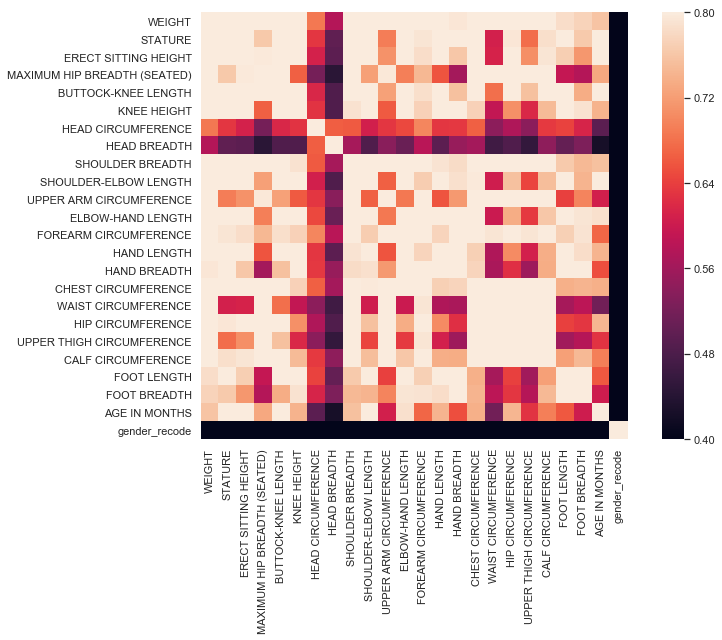

In [9]:
# Making correlation matrix.
corrmat = df_full.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, vmin=.4, square=True)
plt.tight_layout()
plt.savefig('CorrMat both Sexs.png', dpi=300)
plt.show()

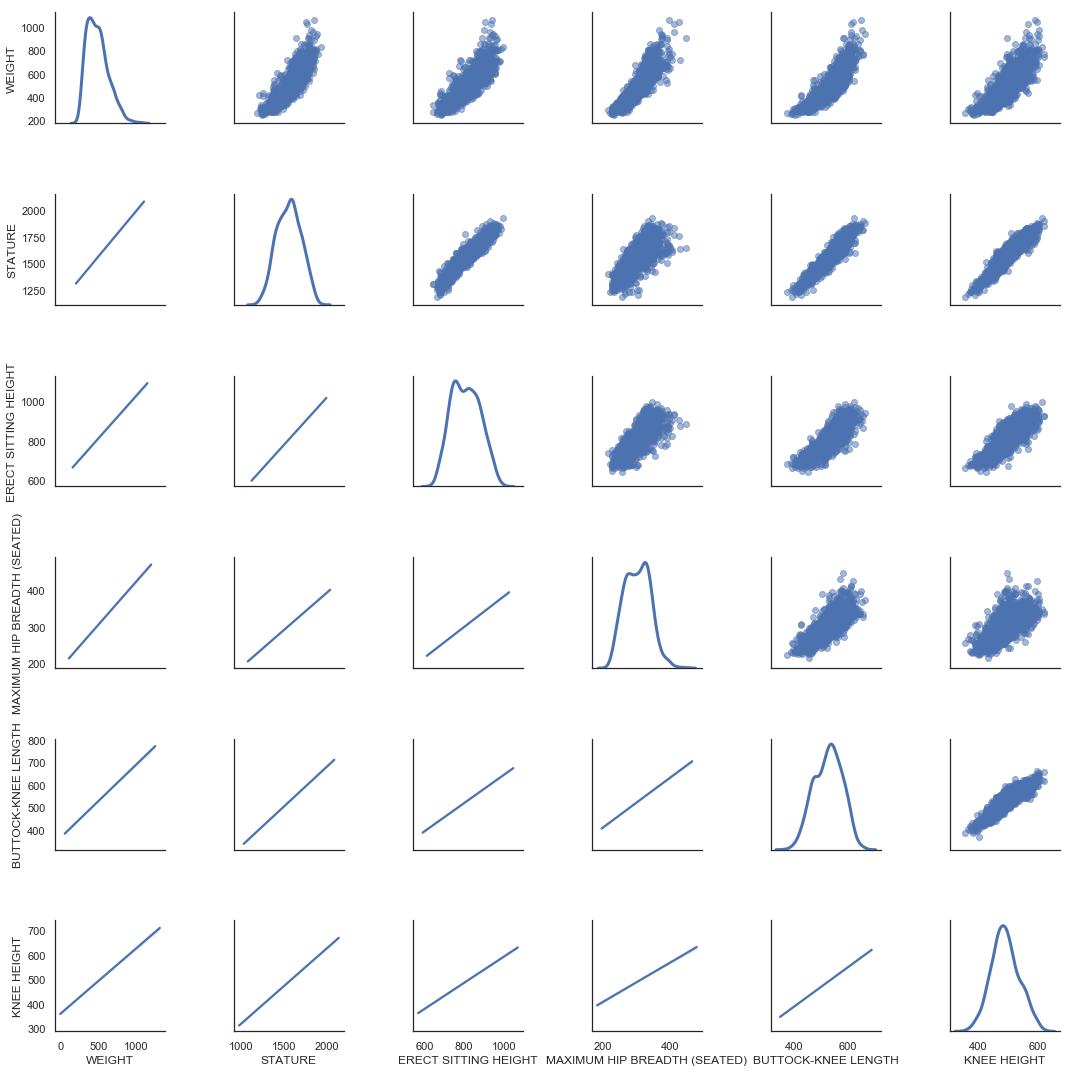

In [10]:
# Make the scatterplot matrix

# Set the default plot aesthetics to be prettier.
sns.set_style("white")

# Make a copy of the data to add jitter to and plot.
df_jittered = df_full.loc[:,  'WEIGHT':'KNEE HEIGHT'].dropna()

# Making the random noise.
jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size=(df_jittered.shape)),
    columns=df_jittered.columns
)
# Combine the data and the noise.
df_jittered = df_jittered.add(jitter)

# Make a scatterplot matrix.
g = sns.PairGrid(df_jittered.dropna(), diag_sharey=False)

# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)

# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))

# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.tight_layout()
plt.savefig('Scatterplt both Sexs.png', dpi=200)
plt.show()

## PCA

In [11]:
# PCA from many features to 10 PCs
from sklearn.decomposition import PCA
from sklearn import preprocessing
#X_scaled = pd.DataFrame
X = df_full.loc[:, (df_full.columns != 'CHEST CIRCUMFERENCE')
                & (df_full.columns != 'cat_size')]
X_scaled = pd.DataFrame(preprocessing.scale(
    X), index=X.index, columns=X.columns)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

pca = PCA(n_components=10)
pc = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data=pc)

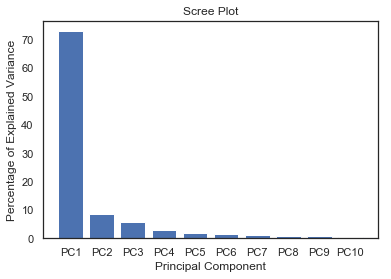

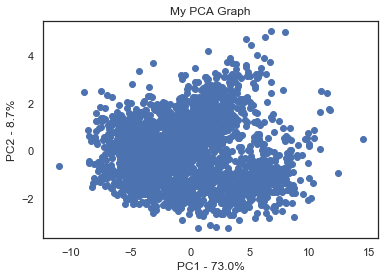

In [12]:
# The following code constructs the Scree plot
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.savefig('Scree_Plot_2SEX.png', dpi=300)
plt.show()

# the following code makes a fancy looking plot using PC
pca_df = pd.DataFrame(pc, columns=labels)

plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

plt.savefig('PCA Scatter 2SEX.png', dpi=300)
plt.show()

## TSNE

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2151 samples in 0.002s...
[t-SNE] Computed neighbors for 2151 samples in 0.200s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2151
[t-SNE] Computed conditional probabilities for sample 2000 / 2151
[t-SNE] Computed conditional probabilities for sample 2151 / 2151
[t-SNE] Mean sigma: 0.932522
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.326355
[t-SNE] KL divergence after 300 iterations: 1.264919


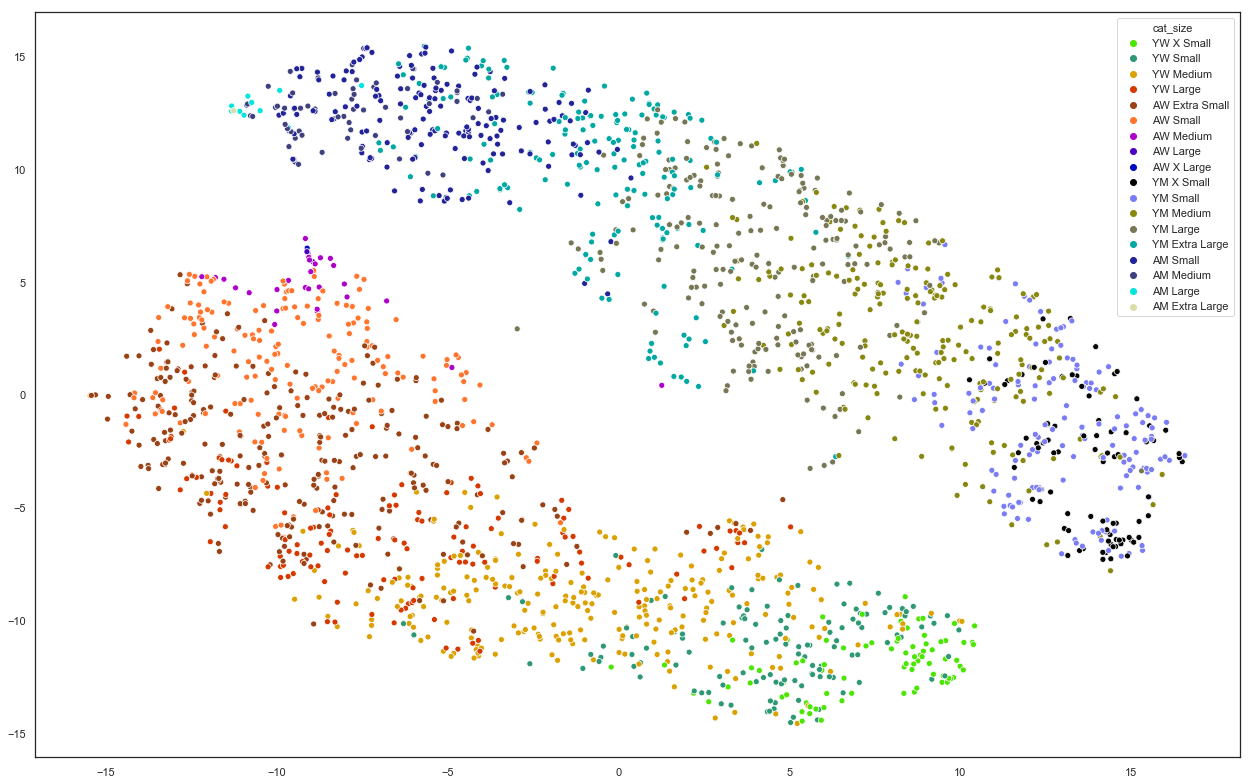

In [23]:
# This shows the clustering of datapoints and their relative shirt size.
import time
from sklearn import cluster
from sklearn.manifold import TSNE
a4_dims = (17.5, 11)
fig, ax = plt.subplots(figsize=a4_dims)
flatui = ["#4ae500", "#2d9873", "#dba100", "#d63900", "#984216",
          '#FF752E', '#ad00c8', '#4d00c3', '#000dbf', '#030303',
          '#797cf2', '#888811', '#777755', '#00a8a3', '#222299',
          '#3f417f', '#00e5de', '#ddddaa']  # , '#FF4040', '#0000FF',
# '#E3CF57', '#8A3324', '#b0b031', '#b87f0d']
order = ['YW X Small', 'YW Small', 'YW Medium', 'YW Large', 'AW Extra Small',
         'AW Small', 'AW Medium', 'AW Large', 'AW X Large', 'YM X Small',
         'YM Small', 'YM Medium', 'YM Large', 'YM Extra Large', 'AM Small',
         'AM Medium', 'AM Large', 'AM Extra Large']

n_sne = 7000

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X_scaled)

sns.scatterplot(tsne_results[:, 0], tsne_results[:, 1],
                hue=df_full.cat_size, palette=flatui,
                hue_order=order, ax=ax)
plt.tight_layout()
plt.savefig('TSNE 2Sex.png', dpi=300)

# Model Selection
Since there are several linear relationships, I'll start with some linear models.

In [26]:
# Defining cross-validation parameters.
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

# Defining X and y
X_pc = pc[:, 0:2]
y = df_full['CHEST CIRCUMFERENCE']

# Creating my training data
X_train, X_test, y_train, y_test = train_test_split(
    X_pc, y, test_size=0.2, random_state=42)

## Linear Regression on PCA


R-squared:
0.8900068900395766
Accuracy Score: 
 0.8839835107297047

Coefficients: 
 [20.96749789  8.55105376]

Intercept: 
 778.5416568567073

Mean (SD) Cross Validation Score: 0.94 (+/- 0.01)

Cross Validation Scores:
[0.93959625 0.93567726 0.94394341 0.93916631 0.94095636]


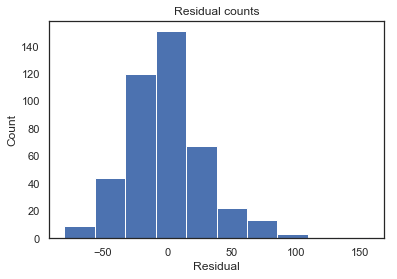

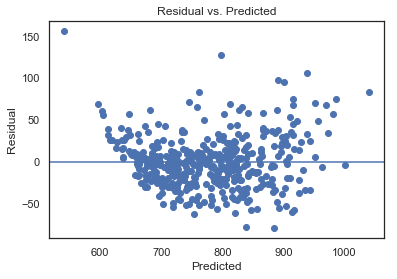

In [27]:
from sklearn import linear_model

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
regrfit = regr.fit(X_train, y_train)

# Inspect the results.
print('\nR-squared:')
print(regrfit.score(X_train, y_train))
print('Accuracy Score: \n', regrfit.score(X_test, y_test))
print('\nCoefficients: \n', regrfit.coef_)
print('\nIntercept: \n', regrfit.intercept_)

# Cross validation
score = cross_val_score(regrfit, X, y, cv=cv)

print("\nMean (SD) Cross Validation Score: %0.2f (+/- %0.2f)" %
      (score.mean(), score.std() * 2))
print('\nCross Validation Scores:')
print(score)

# Extract predicted values.
predicted = regrfit.predict(X_test).ravel()
actual = y_test

# Calculate the error, also called the residual.
residual = actual - predicted

# Plot Residual counts
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.savefig('Residual Counts PCA OLS 2sex.png', dpi=300)
plt.show()

# Plot residual v predicted
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.savefig('Scedacity PCA OLS 2sex.png', dpi=300)
plt.show()

## sklearn Feature Selection vs PCA 

In [28]:
from sklearn.feature_selection import VarianceThreshold


def variance_threshold_selector(data, threshold):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [29]:
variance_threshold = variance_threshold_selector(
    X_scaled_df, threshold=(.8 * (1 - .8)))

In [30]:
# Sanity check.
X_scaled_df.columns.unique()

Index(['WEIGHT', 'STATURE', 'ERECT SITTING HEIGHT',
       'MAXIMUM HIP BREADTH (SEATED)', 'BUTTOCK-KNEE LENGTH', 'KNEE HEIGHT',
       'HEAD CIRCUMFERENCE', 'HEAD BREADTH', 'SHOULDER BREADTH',
       'SHOULDER-ELBOW LENGTH', 'UPPER ARM CIRCUMFERENCE', 'ELBOW-HAND LENGTH',
       'FOREARM CIRCUMFERENCE', 'HAND LENGTH', 'HAND BREADTH',
       'WAIST CIRCUMFERENCE', 'HIP CIRCUMFERENCE', 'UPPER THIGH CIRCUMFERENCE',
       'CALF CIRCUMFERENCE', 'FOOT LENGTH', 'FOOT BREADTH', 'AGE IN MONTHS',
       'gender_recode'],
      dtype='object')

In [31]:
# Creating my training data
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    variance_threshold, y, test_size=0.2, random_state=42)

## OLS Regression with Variance Threshold


R-squared: 
 0.9455798922925136
Accuracy Score: 
 0.9389375229478456

Intercept: 
 778.719145137801

Coefficients: 
 [45.27523321 -8.92613158  1.58695113 -4.95319325  0.19732535  3.55605244
  0.64769224 -0.07635542 35.38533298  0.95873681  9.14101609 -5.24410414
 11.81198485  3.05958261  1.7286043   7.52837583  2.92992812 -7.97095817
 -5.92891944 -4.50167632  0.68274296  5.88842468  3.59155589]

Mean (SD) Cross Validation Score: 0.94 (+/- 0.01)

Cross Validation Scores:
[0.93959625 0.93567726 0.94394341 0.93916631 0.94095636]


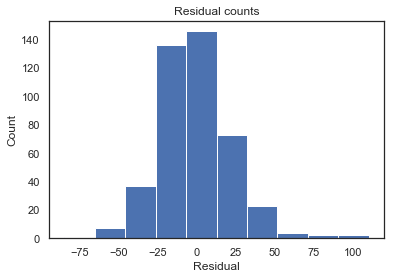

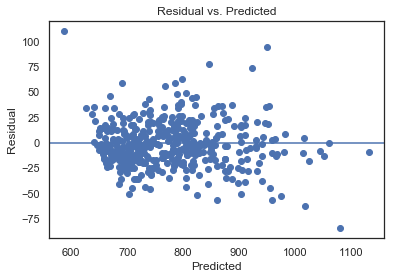

In [32]:
regr1 = linear_model.LinearRegression()
regr1fit = regr1.fit(X_train1, y_train1)
print('\nR-squared: \n', regr1fit.score(X_train1, y_train1))
print('Accuracy Score: \n', regr1.score(X_test1, y_test1))
print('\nIntercept: \n', regr1fit.intercept_)
print('\nCoefficients: \n', regr1fit.coef_)

# Cross validation

score = cross_val_score(regr1fit, variance_threshold, y, cv=cv)

print("\nMean (SD) Cross Validation Score: %0.2f (+/- %0.2f)" %
      (score.mean(), score.std() * 2))
print('\nCross Validation Scores:')
print(score)

# Extract predicted values.
predicted = regr1.predict(X_test1).ravel()
actual = y_test1

# Calculate the error, also called the residual.
residual = actual - predicted

# Plot Residual counts
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.savefig('Residual Counts OLS2 2sex.png', dpi=300)
plt.show()

# Plot residual v predicted
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.savefig('Scedacity OLS2 2sex.png', dpi=300)
plt.show()

## OLS VS Ridge and Lasso.

In [33]:
# Creating my training data
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X, y, test_size=0.2, random_state=42)

## Lasso regression trained on training data

R² for the Lasso model: 
 0.9454098809967613
Accuracy Score: 
 0.9387162972464775

Intercept: 
 249.21323310363198

Coefficients: 
 [ 3.12453632e-01 -4.66633898e-02  1.41257962e-02 -1.07901756e-01
  3.27834812e-03  5.36954798e-02  2.17679669e-02 -1.07989935e-02
  8.29938789e-01  1.51335926e-02  2.51223900e-01 -1.13364314e-01
  4.16919804e-01  2.17980979e-01  1.29041013e-01  8.57470859e-02
  3.93475131e-02 -1.06623172e-01 -1.57508672e-01 -2.26879185e-01
  2.95191384e-02  1.65861348e-01  3.29725844e+00]

Mean (SD) Cross Validation Score: 0.93 (+/- 0.05)

Cross Validation Scores:
[0.86529923 0.91238558 0.93150395 0.92983073 0.92028677 0.94457551
 0.95758169 0.94608826 0.95679939 0.95492529]


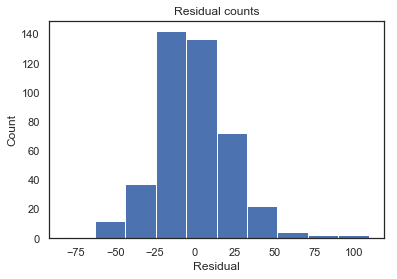

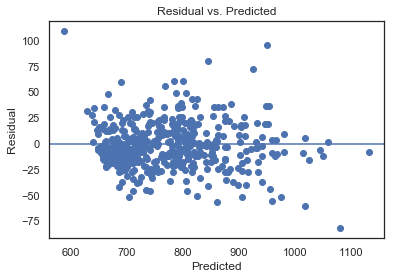

In [34]:
lass = linear_model.Lasso(alpha=.35)
lassfit = lass.fit(X_train2, y_train2)
print('R² for the Lasso model: \n', lass.score(X_train2, y_train2))
print('Accuracy Score: \n', lassfit.score(X_test2, y_test2))
print('\nIntercept: \n', lassfit.intercept_)
print('\nCoefficients: \n', lassfit.coef_)

# Cross validation

score = cross_val_score(lassfit, X, y, cv=10)

print("\nMean (SD) Cross Validation Score: %0.2f (+/- %0.2f)" %
      (score.mean(), score.std() * 2))
print('\nCross Validation Scores:')
print(score)

# Extract predicted values.
predicted = lass.predict(X_test2)
actual = y_test2

# Calculate the error, also called the residual.
residual = actual - predicted

# Plot Residual distribution
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.savefig('Residual Counts Lasso 2sex.png', dpi=300)
plt.show()

# Plot Residual vs. Predicted
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.savefig('Scedacity Lasso 2sex.png', dpi=300)
plt.show()

## Lasso Regression With Tuned Lambda Trained on All Data

In [35]:
# Finding Lambda
lam_range = np.arange(0, 1, .1)
lam_scores = []
for lam in lam_range:
    lass1 = linear_model.Lasso(alpha=lam)
    scores = cross_val_score(lass1, X, y, cv=10)
    lam_scores.append(scores.mean())

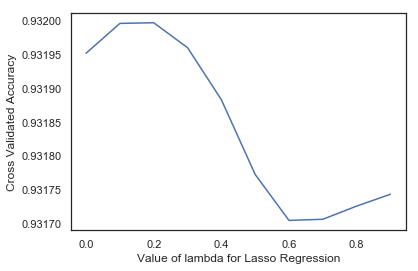

In [36]:
# Plotting lambda between 0 and 1
plt.plot(lam_range, lam_scores)
plt.xlabel('Value of lambda for Lasso Regression')
plt.ylabel('Cross Validated Accuracy')
plt.savefig('Finding Lambda 2sex.png', dpi=300)
plt.show()

R² for the Lasso model: 
 0.9444577885327136
Accuracy Score: 
 0.9444577885327136

Intercept: 
 238.5418718413955

Coefficients: 
 [ 0.31232354 -0.05740045  0.02819876 -0.09767126 -0.02022688  0.06175577
  0.04470219 -0.02569341  0.84022419  0.04759559  0.27227957 -0.13480567
  0.39969227  0.28307509  0.12921546  0.10065446  0.02610813 -0.10669994
 -0.23130772 -0.22824967  0.16827387  0.18880574  5.95014834]

Mean (SD) Cross Validation Score: 0.94 (+/- 0.01)

Cross Validation Scores:
[0.93967086 0.93577852 0.9439218  0.93926277 0.94094413]


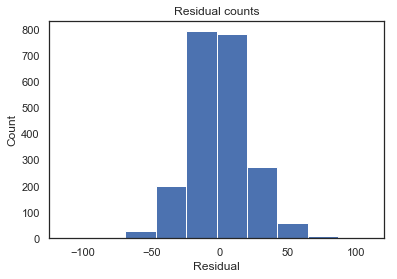

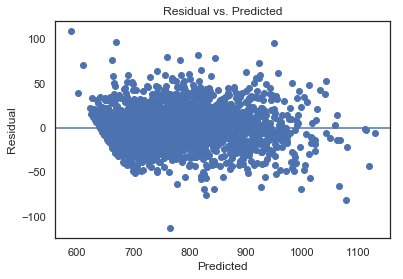

In [37]:
# Lasso with lambda of 2 and trained on whole data.
lass = linear_model.Lasso(alpha=.1)
lassfit = lass.fit(X, y)
print('R² for the Lasso model: \n', lass.score(X, y))
print('Accuracy Score: \n', lassfit.score(X, y))
print('\nIntercept: \n', lassfit.intercept_)
print('\nCoefficients: \n', lassfit.coef_)

# Cross validation

score = cross_val_score(lassfit, X, y, cv=cv)

print("\nMean (SD) Cross Validation Score: %0.2f (+/- %0.2f)" %
      (score.mean(), score.std() * 2))
print('\nCross Validation Scores:')
print(score)

# Extract predicted values.
predicted = lass.predict(X)
actual = y

# Calculate the error, also called the residual.
residual = actual - predicted

# Plot Residual distribution
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.savefig('Residual Counts Lasso Lam 2sex.png', dpi=300)
plt.show()

# Plot Residual vs. Predicted
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.savefig('Scedacity Lasso lam 2sex.png', dpi=300)
plt.show()

## Ridge Regression


R-squared:
0.9444715469192612

Intercept: 
 237.85989374031328

Coefficients: 
 [ 0.3144725  -0.06102455  0.02955457 -0.10240249 -0.02259179  0.06809685
  0.04745175 -0.0274013   0.84101444  0.05199633  0.27570602 -0.13633865
  0.4026719   0.27586868  0.15124424  0.10160927  0.02374542 -0.1107985
 -0.23165259 -0.2249634   0.18150541  0.19094728  7.0337126 ]

Mean (SD) Cross Validation Score: 0.94 (+/- 0.01)

Cross Validation Scores:
[0.93959756 0.93567893 0.94394298 0.93916942 0.94095628]


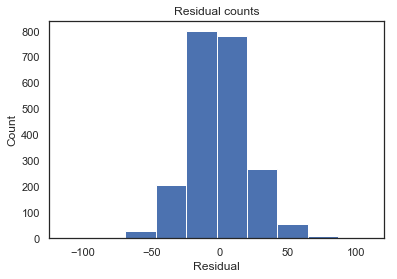

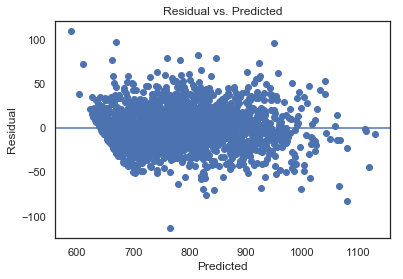

In [38]:
ridgeregr = linear_model.Ridge(alpha=.5, fit_intercept=True)
ridgeregr.fit(X, y)
print('\nR-squared:')
print(ridgeregr.score(X, y))
print('\nIntercept: \n', ridgeregr.intercept_)
print('\nCoefficients: \n', ridgeregr.coef_)
# Cross validation

score = cross_val_score(ridgeregr, X, y, cv=cv)

print("\nMean (SD) Cross Validation Score: %0.2f (+/- %0.2f)"
      % (score.mean(), score.std() * 2))
print('\nCross Validation Scores:')
print(score)

# Extract predicted values.
predicted = ridgeregr.predict(X).ravel()
actual = y

# Calculate the error, also called the residual.
residual = actual - predicted

# Plot Residual distribution
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.savefig('Residual Counts Ridge 2sex.png', dpi=300)
plt.show()

# Plot Residual vs. Predicted
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.savefig('Scedacity Ridge 2sex.png', dpi=300)
plt.show()

## Ridge Regression with Tuned Alpha

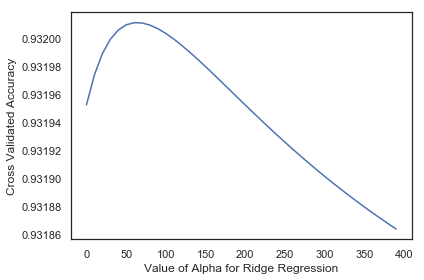

In [39]:
# Finding Alpha
al_range = np.arange(0, 400, 10)
al_scores = []
for al in al_range:
    ridgeregr = linear_model.Ridge(alpha=al, fit_intercept=True)
    scores = cross_val_score(ridgeregr, X, y, cv=10)
    al_scores.append(scores.mean())

# Plotting Alpha between 0 and 100
plt.plot(al_range, al_scores)
plt.xlabel('Value of Alpha for Ridge Regression')
plt.ylabel('Cross Validated Accuracy')
plt.tight_layout()
plt.savefig('Finding Alpha 2sex.png', dpi=400)
plt.show()


R-squared:
0.9444425853850977

Intercept: 
 239.4096852409989

Coefficients: 
 [ 0.3115465  -0.05709796  0.02819692 -0.09659738 -0.01929246  0.06084304
  0.04572495 -0.03603966  0.84039308  0.0488072   0.27058947 -0.13884675
  0.39737837  0.29494613  0.1275589   0.10008487  0.02849437 -0.10526018
 -0.23306816 -0.23430131  0.16771654  0.18847632  5.42505314]

Mean (SD) Cross Validation Score: 0.94 (+/- 0.01)

Cross Validation Scores:
[0.93966738 0.9357726  0.94386928 0.93939971 0.94090833]


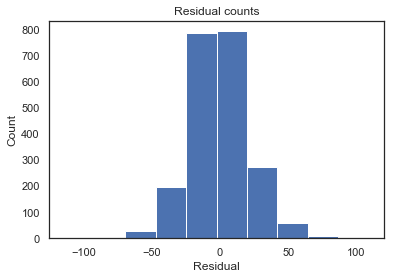

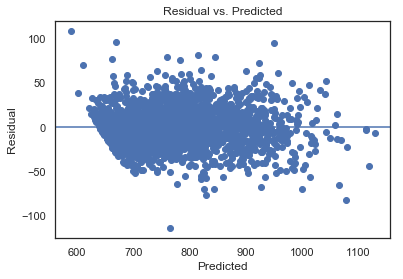

In [40]:
# Ridge Regression
ridgeregr1 = linear_model.Ridge(alpha=60, fit_intercept=True)
ridgeregr1.fit(X, y)
print('\nR-squared:')
print(ridgeregr1.score(X, y))
print('\nIntercept: \n', ridgeregr1.intercept_)
print('\nCoefficients: \n', ridgeregr1.coef_)
# Cross validation

score = cross_val_score(ridgeregr1, X, y, cv=cv)

print("\nMean (SD) Cross Validation Score: %0.2f (+/- %0.2f)"
      % (score.mean(), score.std() * 2))
print('\nCross Validation Scores:')
print(score)

# Extract predicted values.
predicted = ridgeregr1.predict(X).ravel()
actual = y

# Calculate the error, also called the residual.
residual = actual - predicted

# Plot Residual distribution
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.savefig('Residual Counts TRidge 2sex.png', dpi=300)
plt.show()

# Plot Residual vs. Predicted
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.savefig('Scedacity TRidge 2sex.png', dpi=300)
plt.show()

## Random Forest Regression

R² for the RF model: 
 0.9875894759237893
Accuracy Score: 
 0.9875894759237893

Mean (SD) Cross Validation Score: 0.93 (+/- 0.01)

Cross Validation Scores: 
 [0.93078903 0.92558405 0.93599592 0.92922964 0.9340482 ]
Feature ranking:
('WEIGHT', 8, 0.476259935357829)
('STATURE', 0, 0.46025905669543105)
('ERECT SITTING HEIGHT', 10, 0.009028010584339812)
('MAXIMUM HIP BREADTH (SEATED)', 12, 0.006618853189996952)
('BUTTOCK-KNEE LENGTH', 15, 0.006067849694166019)
('KNEE HEIGHT', 18, 0.004280828835701406)
('HEAD CIRCUMFERENCE', 16, 0.004236657922728409)
('HEAD BREADTH', 2, 0.0033650989842542943)
('SHOULDER BREADTH', 21, 0.00335908061079217)
('SHOULDER-ELBOW LENGTH', 6, 0.002641405702169306)
('UPPER ARM CIRCUMFERENCE', 4, 0.002554649854216439)
('ELBOW-HAND LENGTH', 17, 0.00247404002242773)
('FOREARM CIRCUMFERENCE', 19, 0.002337560395281054)
('HAND LENGTH', 7, 0.002329256453533937)
('HAND BREADTH', 3, 0.0021128181211881683)
('WAIST CIRCUMFERENCE', 5, 0.0019425433100256871)
('HIP CIRCUMFERENCE', 

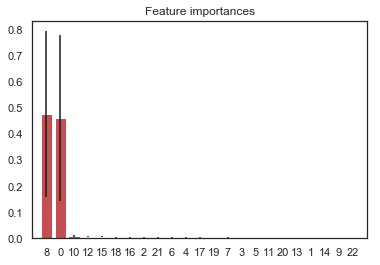

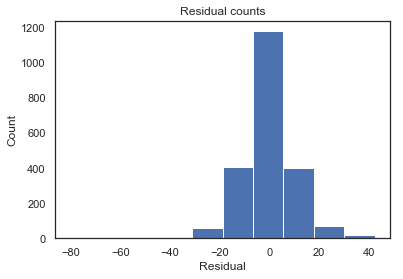

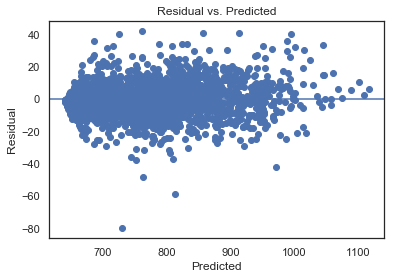

In [41]:
# Random forest regression

rfr = ensemble.RandomForestRegressor()
rfrfit = rfr.fit(X, y)

print('R² for the RF model: \n', rfrfit.score(X, y))
print('Accuracy Score: \n', rfrfit.score(X, y))
score = cross_val_score(rfrfit, X, y, cv=cv)
print("\nMean (SD) Cross Validation Score: %0.2f (+/- %0.2f)" %
      (score.mean(), score.std() * 2))
print('\nCross Validation Scores: \n', score)

importances = rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfr.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print((X.columns[f], indices[f],
           importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

# Extract predicted values.
predicted = rfrfit.predict(X).ravel()
actual = y

# Calculate the error, also called the residual.
residual = actual - predicted

# Plot Residual distribution
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.savefig('Residual Counts RF 2sex.png', dpi=300)
plt.show()

# Plot Residual vs. Predicted
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.savefig('Scedacity RF 2sex.png', dpi=300)
plt.show()

## Random Forest Regression With Tuned Hyperparameters

In [42]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [80, 90, 100, 110],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [43]:
rfr = ensemble.RandomForestRegressor()
rfrfit = rfr.fit(X, y)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rfrfit, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X, y)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  9.9min finished


{'bootstrap': True,
 'max_depth': 110,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 200}

R² for the RF model: 
 0.9786398325964871
Accuracy Score: 
 0.9786398325964871

Mean (SD) Cross Validation Score: 0.94 (+/- 0.01)

Cross Validation Scores: 
 [0.93490003 0.93381331 0.94413059 0.935346   0.93833189]
Feature ranking:
('WEIGHT', 0, 0.521329462002929)
('STATURE', 8, 0.42902337117600176)
('ERECT SITTING HEIGHT', 10, 0.008637662792061547)
('MAXIMUM HIP BREADTH (SEATED)', 12, 0.007717362578318482)
('BUTTOCK-KNEE LENGTH', 15, 0.005203016689435895)
('KNEE HEIGHT', 18, 0.00267627166103754)
('HEAD CIRCUMFERENCE', 21, 0.002476288170560459)
('HEAD BREADTH', 16, 0.0023171786785163065)
('SHOULDER BREADTH', 6, 0.0018575023166429816)
('SHOULDER-ELBOW LENGTH', 2, 0.0017990570234238065)
('UPPER ARM CIRCUMFERENCE', 17, 0.0017164154761070089)
('ELBOW-HAND LENGTH', 4, 0.0016895072525820475)
('FOREARM CIRCUMFERENCE', 7, 0.0016263139891441922)
('HAND LENGTH', 19, 0.0014826895628262038)
('HAND BREADTH', 5, 0.0014812652260429097)
('WAIST CIRCUMFERENCE', 1, 0.001437978782837599)
('HIP CIRCUMFERE

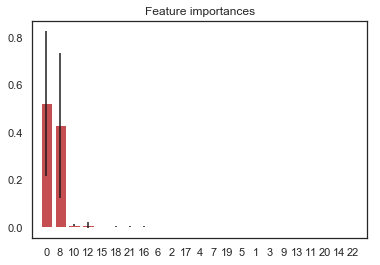

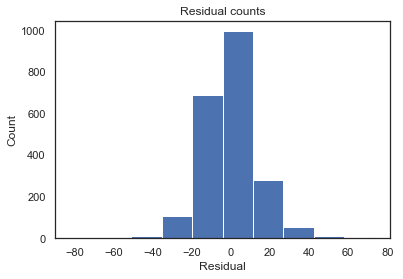

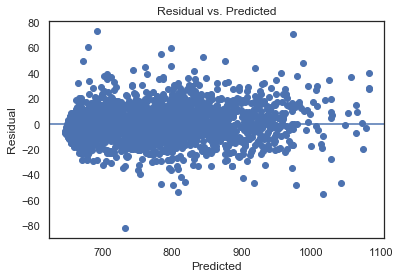

In [44]:
# Random forest regression

rfr = ensemble.RandomForestRegressor(bootstrap=True,
                                     max_depth=110,
                                     min_samples_leaf=4,
                                     min_samples_split=10,
                                     n_estimators=200)
rfrfit = rfr.fit(X, y)

print('R² for the RF model: \n', rfrfit.score(X, y))
print('Accuracy Score: \n', rfrfit.score(X, y))
score = cross_val_score(rfrfit, X, y, cv=cv)
print("\nMean (SD) Cross Validation Score: %0.2f (+/- %0.2f)" %
      (score.mean(), score.std() * 2))
print('\nCross Validation Scores: \n', score)

importances = rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfr.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print((X.columns[f], indices[f],
           importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

# Extract predicted values.
predicted = rfrfit.predict(X).ravel()
actual = y

# Calculate the error, also called the residual.
residual = actual - predicted

# Plot Residual distribution
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.savefig('Residual Counts RF T2sex.png', dpi=300)
plt.show()

# Plot Residual vs. Predicted
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.savefig('Scedacity TRF 2sex.png', dpi=300)
plt.show()

## Tuned Random Forest with Reduced Features

In [45]:
# I identified weight and and stature as the most signifcant features.
newX = df_full.loc[:, ('WEIGHT', 'STATURE')]
newX.head()

,WEIGHT,STATURE
12,499.0,1578.0
13,558.0,1618.0
15,400.0,1468.0
18,359.0,1528.0
19,378.0,1485.0


In [46]:
rfr = ensemble.RandomForestRegressor()
rfrfit = rfr.fit(newX, y)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rfrfit, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)
grid_search.fit(newX, y)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   38.7s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  1.8min finished


{'bootstrap': True,
 'max_depth': 90,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 200}

R² for the RF model: 
 0.9446376607132146
Accuracy Score: 
 0.9446376607132146

Mean (SD) Cross Validation Score: 0.89 (+/- 0.08)

Cross Validation Scores: 
 [0.81777043 0.82912202 0.88227291 0.89291612 0.87452757 0.928384
 0.92773404 0.91170287 0.9262821  0.93958311]
Feature ranking:
('WEIGHT', 0, 0.9780799317065357)
('STATURE', 1, 0.021920068293464247)


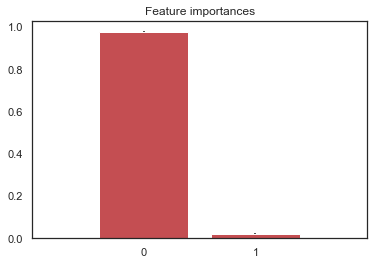

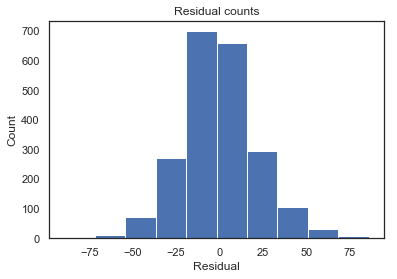

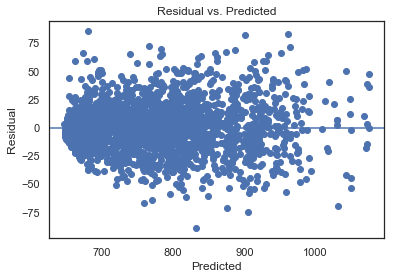

In [47]:
# Random forest with less features
rfr1 = ensemble.RandomForestRegressor(bootstrap=True,
                                      max_depth=90,
                                      min_samples_leaf=5,
                                      min_samples_split=12,
                                      n_estimators=200)
rfrfit1 = rfr1.fit(newX, y)

print('R² for the RF model: \n', rfrfit1.score(newX, y))
print('Accuracy Score: \n', rfrfit1.score(newX, y))
score = cross_val_score(rfrfit1, newX, y, cv=10)
print("\nMean (SD) Cross Validation Score: %0.2f (+/- %0.2f)" %
      (score.mean(), score.std() * 2))
print('\nCross Validation Scores: \n', score)

importances = rfr1.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfr1.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(newX.shape[1]):
    print((newX.columns[f], indices[f],
           importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(newX.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(newX.shape[1]), indices)
plt.xlim([-1, newX.shape[1]])
plt.show()

# Extract predicted values.
predicted = rfrfit1.predict(newX).ravel()
actual = y

# Calculate the error.
residual = actual - predicted

# Plot Residual distribution
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.savefig('Residual Counts TRF 2sex.png', dpi=300)
plt.show()

# Plot Residual vs. Predicted
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.savefig('Scedacity TRF 2sex.png', dpi=300)
plt.show()

Reducing features does not improve model performance, however its does
make the model simpler.